In [ ]:
##### General ToDo list:

# For select_data() function, add "STAGE/ROUTE" selection
#     Add an ooption to view screening 'STAGE/ROUTE' only as well

#//ToDo: write a function to fliter out only singificant breaches/ significant number of cases pe trust etc

# Select_data() is now redundant with filter_data()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go


In [4]:
from data_wrangling import get_national
from cancer_plotting import prop_breaches_graph

In [5]:
# code example being used - note will need to run the national_data code first 
national_data_link = r'https://www.england.nhs.uk/statistics/wp-content/' \
    + 'uploads/sites/2/2023/12/' \
    + 'CWT-CRS-National-Time-Series-Oct-2009-Oct-2023-with-Revisions.xlsx'

national_data = get_national(national_data_link)
labels = ['Within Standard_28', 'Outside Standard_28', 'Within Standard_31', 'Outside Standard_31'] 
data_to_plot=['Month','Within Standard_28', 'Outside Standard_28', 'Within Standard_31', 'Outside Standard_31']


In [7]:

prop_breaches_graph(data, filters={'start_month':'05-2022',
                              'end_month':'05-2022',
                              'standard':'FDS'}, window_size=2)

TypeError: Invalid comparison between dtype=int64 and str

In [8]:
from data_wrangling import get_provider_data, nhs_code_link, help_with, read_icb_sicb_coding
from data_wrangling import select_months, select_org, select_cancer, select_standard
from data_wrangling import filter_data
from data_wrangling import proportion_breaches


from cancer_plotting import breaches_animated_plot

from cancer_plotting import plot_icb_map


In [9]:
data = get_provider_data()

In [11]:
select_cancer(data, cancer_type=['Deliberately_wrong_name','Unsuspected_breast_ca', 'All_Cancers']).head()

Error ocurred with value "Deliberately_wrong_name", removing it and continuing


,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,R1K,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,262,255,7
2022-04-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,382,144,238
2022-04-01,28-day FDS,R0D,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,3,2,1
2022-04-01,28-day FDS,R1F,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,66,63,3
2022-04-01,28-day FDS,RAS,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,81,78,3


In [14]:
select_org(data, ['R0A', 'R0D', 'non-existent']).head()

Value non-existent was not in the list, continuing


,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,382,144,238
2022-04-01,28-day FDS,R0D,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,3,2,1
2022-04-01,28-day FDS,R0A,screening,not_applicable_FDS,Invalid,143,67,76
2022-04-01,28-day FDS,R0D,screening,not_applicable_FDS,Suspected_breast_ca,12,9,3
2022-04-01,28-day FDS,R0D,screening,not_applicable_FDS,Suspected_gynecological_ca,1,0,1


In [ ]:
select_months(data, end_date='2023-10-01')

In [15]:
filter_data(df=data, filters={'start_month':'05-2022',
                              'end_month':'05-2022',
                              'standard':'FDS'})

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-05-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,403,185,218
2022-05-01,28-day FDS,R1H,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,334,332,2
2022-05-01,28-day FDS,R1K,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,229,225,4
2022-05-01,28-day FDS,RAS,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,56,53,3
2022-05-01,28-day FDS,RA9,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,41,35,6
...,...,...,...,...,...,...,...,...
2022-05-01,28-day FDS,RWW,urgent_suspected_cancer,not_applicable_FDS,Suspected_urological_ca,101,41,60
2022-05-01,28-day FDS,RTK,urgent_suspected_cancer,not_applicable_FDS,Suspected_urological_ca,115,68,47
2022-05-01,28-day FDS,RXW,urgent_suspected_cancer,not_applicable_FDS,Suspected_urological_ca,261,120,141


In [16]:
help(select_standard)

Help on function select_standard in module data_wrangling:

select_standard(df, standards, strict=False)
    Parameters
    ----------
     df : Dataframe
       Dataframe that requires filtering
       
    standard_list : A string or list of standard that you wish to include from
    
    FDS = Four week wait (28 days) from patient told they have cancer to cancer
    diagnosed or excluded.
    DTT = 31 days wait from decision to treat/ earliest clinically appropriate
    date to first or subsequant treatment of cancer.
    RTT = 62 days wait from urgent suspected cancer,
    breast symptomatic referall,urgent screening referall or consultant upgrade
    to first definitive treatment of cancer.
    e.g to include only FDS and DTT standards:
    standard_list = ['FDS', 'DTT']
    
    
    Raises
    ------
    ValueError
        If any standard in standard_list is not 'FDS', 'DTT', or 'RTT'
    
    Returns
    -------
    df : Dataframe
    Containing only standards in standard_list


In [ ]:
help_with('standards')

In [ ]:
######## Below is work in progress on creating a map with statistics

In [41]:
from cancer_plotting import plot_icb_map

In [356]:
x = select_to_plot(data, filters={'start_month':'05-2022',
                              'end_month':'01-2023',
                              'standard':'RTT',
                                  'treatment_modality':['radiotherapy', 'surgery']
                                })

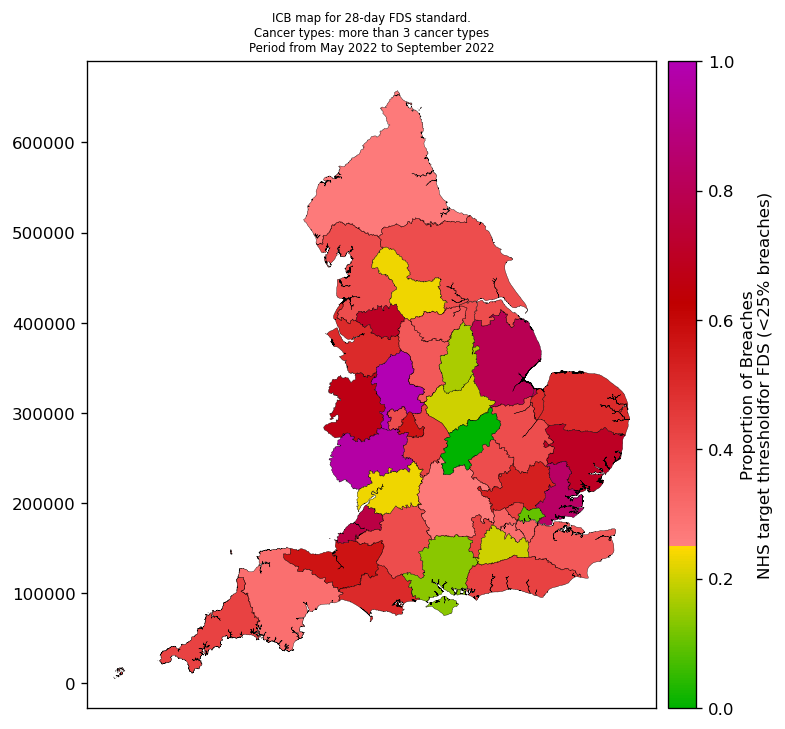

In [19]:
fig,ax = plot_icb_map(data, filters={'start_month':'05-2022',
                              'end_month':'09-2022',
                              'standard':'FDS',
                                },
                      dpi=120)
